In [1]:
!ls ./movielens

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!head ./movielens/movies.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!head ./movielens/ratings.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!head ./movielens/tags.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!head ./movielens/links.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


### Average rating per genre, per decade

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
#from ggplot import *

In [2]:
movies = pd.read_csv('./movielens/movies.csv', sep = ',')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('./movielens/ratings.csv', sep = ',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [4]:
ratings = ratings[['movieId', 'rating']].groupby('movieId', as_index=False).mean()
ratings.head()

,movieId,rating
0,1,3.886649
1,2,3.246583
2,3,3.173981
3,4,2.874540
4,5,3.077291


In [5]:
movies_w_ratings = movies.merge(ratings, on='movieId', how='inner')
movies_w_ratings.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.886649
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.246583
2,3,Grumpier Old Men (1995),Comedy|Romance,3.173981
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.874540
4,5,Father of the Bride Part II (1995),Comedy,3.077291


In [6]:
movies_w_ratings['genres'] = movies_w_ratings['genres'].str.split('|')
movies_w_ratings.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.886649
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",3.246583
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",3.173981
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",2.874540
4,5,Father of the Bride Part II (1995),[Comedy],3.077291


##### **Geting all the unique different movie genres in the dataset:**

In [7]:
def get_unique_items(ser: pd.Series):
    unq = []
    for i in ser:
        for j in i:
            if j not in unq:
                unq.append(j)
    return unq

In [8]:
genres = get_unique_items(movies_w_ratings['genres'])
print(genres)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']


##### **Make filters per genre and sumarising:**

In [9]:
def fltr_per_genre(ser: pd.Series, genre: str):
    genre_filter = np.full(ser.size, False, dtype=bool)
    c = 0
    for l in ser:
        if genre in l:
            genre_filter[c] = True
        c += 1
    return genre_filter

In [10]:
genres_distribution = pd.DataFrame(columns=['genre', 'distribution'])
for genre in genres:
    genres_distribution.loc[-1] = [genre, fltr_per_genre(movies_w_ratings['genres'], genre).mean()]  # adding a row
    genres_distribution.index = genres_distribution.index + 1  # shifting index
    genres_distribution = genres_distribution.sort_index()  # sorting by index

In [11]:
genres_distribution
#genres_distribution['distribution'].max()

,genre,distribution
0,(no genres listed),0.069253
1,Film-Noir,0.006680
2,Western,0.020264
3,Musical,0.019948
4,War,0.031287
5,Documentary,0.091280
6,IMAX,0.003656
7,Sci-Fi,0.061552
8,Mystery,0.047765
9,Horror,0.097070


##### **Ploting the distribution of genres in movies:**

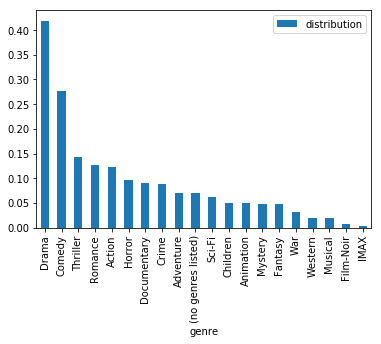

In [12]:
genres_distribution = genres_distribution.sort_values(by=['distribution'], ascending=False)
genres_distribution.set_index("genre",drop=True,inplace=True)
genres_distribution.plot(kind='bar')
#ggplot(aes(x='genre', y='distribution'), data = genres_distribution) + geom_bar() + 

##### **Extracting the value for the year in a separate column:**

In [13]:
movies_w_ratings['year'] = movies_w_ratings['title'].str.extract('.*\((.*)\).*', expand=True)
movies_w_ratings.head()

,movieId,title,genres,rating,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.886649,1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",3.246583,1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",3.173981,1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",2.874540,1995
4,5,Father of the Bride Part II (1995),[Comedy],3.077291,1995


In [14]:
type(movies_w_ratings['year'])

pandas.core.series.Series

In [15]:
movies_w_ratings['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950',
       '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972',
       '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', nan, '1903',
       '2007', '2008', '2009', '1912', '2010', 'Das Millionenspiel',
       '1913', '2011', '1898', '1899', 'Bicicleta, cullera, poma', '1894',
       

##### **Cleaning the columns that contain invalid year numbers:**

In [16]:
def filter_for_int(ser: pd.Series):
    field_filter = np.full(ser.size, False, dtype=bool)
    c = 0
    for i in ser:
        try:
            int(i)
            field_filter[c] = True
            c += 1
        except ValueError:
            field_filter[c] = False
            c += 1
    return field_filter

In [17]:
filter_years = filter_for_int(movies_w_ratings['year'])
movies_w_ratings = movies_w_ratings[filter_years]
movies_w_ratings['year'] = pd.to_numeric(movies_w_ratings['year'])
type(movies_w_ratings['year'].iloc[1])

numpy.int64

In [44]:
movies_w_ratings['year'].unique()

array([1995, 1994, 1996, 1976, 1992, 1988, 1967, 1993, 1964, 1977, 1965,
       1982, 1985, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1950, 1946,
       1987, 1997, 1974, 1956, 1958, 1949, 1972, 1998, 1933, 1952, 1951,
       1957, 1961, 1954, 1934, 1944, 1963, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1979, 1971, 1978, 1966, 1962,
       1983, 1984, 1931, 1922, 1999, 1927, 1929, 1930, 1928, 1925, 1914,
       2000, 1919, 1923, 1920, 1918, 1921, 2001, 1924, 2002, 2003, 1915,
       2004, 1916, 1917, 2005, 2006, 1902, 1903, 2007, 2008, 2009, 1912,
       2010, 1913, 2011, 1898, 1899, 1894, 2012, 1909, 1910, 1901, 1893,
       2013, 1896, 2014, 2015, 1895, 1911, 1900, 2016, 2017, 2018, 1905,
       1904, 1891, 1892, 1908, 1897, 1887, 1888, 1890, 1878, 1874, 1906,
       1883, 1907], dtype=int64)

Some ideas:
* original movie vs sequel ratings
* very good movies > 8.0 rating
* predictive model to try and predict the rating of the sequel, is there coleniarity, correlation
* budget vs movie rating
* average rating through decades per genre line plot

In [117]:
movies_w_ratings['decade'] = (movies_w_ratings['year'] - 1900)//10

In [118]:
movies_w_ratings['decade'].unique()

array([ 9,  7,  8,  6,  3,  4,  5,  2,  1, 10,  0, 11, -1, -2, -3],
      dtype=int64)

In [119]:
movies_per_decades = movies_w_ratings[['decade','rating']].groupby(['decade'], as_index=False).mean()#.copy()

In [120]:
def set_decades(ser: pd.Series):
    d = {-3:'1870s', -2:'1880s', -1:'1890s', 0:'1900s', 10:'2000s', 11:'2010s'}
    for i in range(1,10):
        d[i] = '19' + str(i) + '0s'
    c = 0
    for r in ser:
        ser.iloc[c] = d[r]
        c += 1
    return ser

In [121]:
movies_per_decades['decade'] = set_decades(movies_per_decades['decade'].copy())

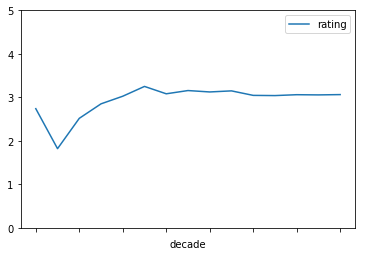

In [122]:
#movies_per_decades.set_index('decade',drop=True,inplace=True)
movies_per_decades.plot(kind='line', x = 'decade', y = 'rating', ylim=(0,5))

In [94]:
movies_per_decades

,decade,rating
0,1870s,2.739286
1,1880s,1.819854
2,1890s,2.517034
3,1900s,2.850502
4,1910s,3.025592
5,1920s,3.250946
6,1930s,3.081444
7,1940s,3.155960
8,1950s,3.123856
9,1960s,3.148541
